In [1]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Time to get cooking! You are optimising a cake recipe. There are five ingredients. The outputs correspond to the sum of different objectives: flavor, consistency, calories, waste and cost. Each objective receives negative points by our expert taster. You want this sum to be as close to zero as possible!

In [2]:
X = np.load('../initial_data/function_6/initial_inputs.npy')
Y = np.load('../initial_data/function_6/initial_outputs.npy')

## Random Search

In [3]:
next_query = np.random.uniform(size=5)
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

next_query: 0.215175-0.865625-0.265229-0.174063-0.772903


## Upper Confidence Bound

In [4]:
gpr = GaussianProcessRegressor(kernel=None)
gpr.fit(X, Y)

# use gridsearch to optimise the acquisition function
x1 = np.linspace(0, 1, 5)
x2 = np.linspace(0, 1, 5)

dim=5
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1, dim)

mean, std = gpr.predict(X_grid, return_std=True)
ucb = mean + 1.96 * std

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

next_query: 0.000000-0.000000-0.000000-1.000000-0.000000


## Visualising the data

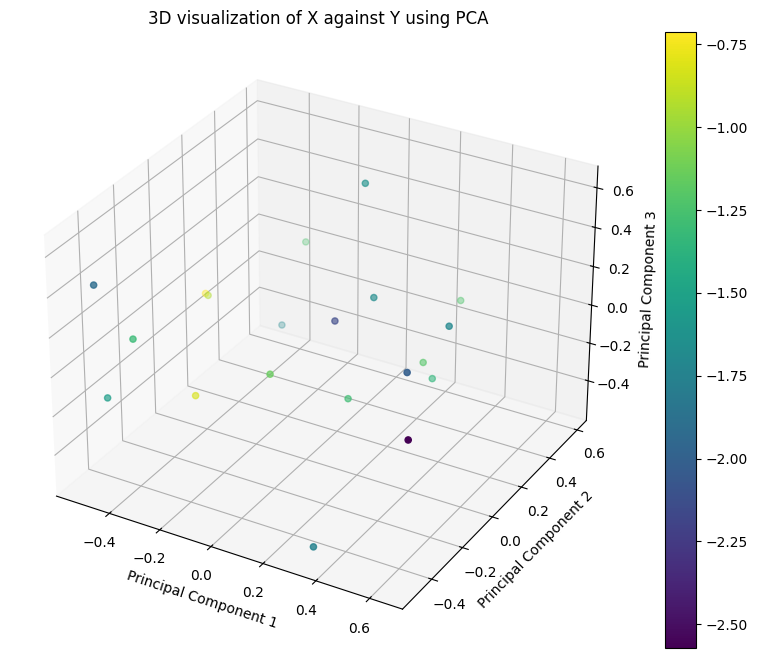

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Assume that 'X' is your 8-dimensional numpy array and 'Y' is your 1-dimensional array
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap='viridis')

# Add a colorbar
fig.colorbar(scatter)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D visualization of X against Y using PCA')
plt.show()